<center><h1><span style="color: green; font-weight: bold;">After the Show:</span> <span style="color: black; font-weight: bold;">Halftime Performance's Impact on an Artist's Popularity</span></h1></center>
<br>
------------------------------------------------------------------------------------------------------------------


## Problem Statement
The goal of this project is to analyze the popularity of artists who have performed during the Super Bowl halftime show over the last **10 years**. By leveraging data from **Spotify, YouTube, and tour revenue**, we aim to gain insights into the artists' popularity before and after their halftime performances. This will help us understand the effect of the Super Bowl halftime show.

## Research and Analysis Design
The overall design of this project is structured into three distinct parts to analyze the popularity of Super Bowl halftime show artists. Firstly, we leverage the **Spotify API** to determine popularity using Spotify's data, focusing on **popularity scores**. Secondly, we perform **sentiment analysis** on YouTube comments using the **YouTube API** and **NLTK** to gain insights from viewers' feedback on the artists' performance videos. Lastly, we employ advanced mathematical computations using **Pandas** and **NumPy** to analyze the return on investment (ROI) of artists' tours, examining revenue before and after the halftime show and identifying additional patterns and trends.

## Limitations and Solutions
- **Spotify API** Limitations
  - Limited historical data: Overcame this by leveraging the available data from the last **10 years**.
  - Popularity metric: Acknowledged that the popularity score alone may not capture the full picture of an artist's popularity, so we considered additional factors.
- **YouTube API** limitations:
  - Restricted access to all comments: Overcame this by scraping comments from videos posted by the NFL and, in the case of Beyoncé, using the most engaged video on YouTube.
  - Time-based comment sorting: Adapted the methodology to order comments by relevance instead of time to capture a broader sentiment.
- **Matplotlib** limitations:
  - Visualizing sentiment analysis results: Explored alternative libraries like Seaborn and Plotly to enhance the visualization of sentiment analysis findings.
- **Methodology** considerations:
  - Bias in sentiment analysis: Employed advanced preprocessing techniques and carefully evaluated sentiment analysis results to minimize bias.
  - Statistical significance in ROI analysis: Utilized appropriate statistical tests to determine the significance of revenue changes and validated the results.
  - Controlling variables: Accounted for external factors that could influence an artist's popularity and revenue, such as concurrent marketing campaigns or external events.
  - Accounting for temporal variations: Addressed fluctuations in popularity scores by considering both peak and mean values to capture the overall trend.

By acknowledging these limitations and adopting specific strategies, such as exploring alternative libraries, preprocessing techniques, and employing appropriate statistical tests, we ensure the **robustness and reliability** of our findings. These measures help us overcome challenges and provide meaningful insights into the popularity dynamics of Super Bowl halftime show artists.

## Hypothesis
We hypothesize that artists who perform at the Super Bowl halftime show experience a significant increase in popularity following their performances. This increase can be observed through metrics such as **Spotify's popularity score**, sentiment analysis of **YouTube comments** on their halftime show performances, and changes in **tour revenue**.

## Goals
The primary goal of this project is to provide our client with a comprehensive analysis of the popularity of artists who have performed at the **Super Bowl halftime show**. By examining various data sources and employing different analytical techniques, we aim to achieve the following objectives:

- Quantify the impact of the Super Bowl halftime show on an artist's popularity based on **Spotify data**:
  - Assess the artists' popularity scores on Spotify before and after their halftime performances.
  - Identify any significant changes or trends in popularity scores and visualize the findings.

- Analyze sentiment from **YouTube comments** on the halftime show performances:
  - Scrape YouTube comments from videos posted by the NFL (except for **Beyoncé**, where we will use the most engaged video on YouTube).
  - Perform sentiment analysis on the comments to determine the overall sentiment towards each artist's performance.
  - Examine sentiment trends and identify any patterns or differences between artists.

- Explore the financial impact of halftime performances on **tour revenue**:
  - Collect data on tour revenue for each artist in the pre-halftime and post-halftime periods.
  - Apply statistical and advanced mathematical computations to quantify the change in revenue.
  - Compare the revenue change with the artists' popularity scores and sentiment analysis results.

- Provide actionable insights and recommendations:
  - Summarize the findings from all three segments of analysis.
  - Identify key factors influencing an artist's post-halftime popularity.
  - Recommend strategies for maximizing an artist's exposure and leveraging the Super Bowl halftime show to boost their career.


-------------------------------------------------------------------

<center><h1><span style="color: green; font-weight: bold;">Data Collection</span> <span style="color: black; font-weight: bold;">& Prep</span></h1></center>
<br>

In [127]:
# APIs and Scraping Libraries
from googleapiclient.discovery import build
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy

# Standard Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
import os
from datetime import datetime
import unidecode
from scipy import stats

import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from langdetect import detect
from autocorrect import Speller
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from string import punctuation
import string
import unicodedata

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

import pandas as pd

from wordcloud import WordCloud
from collections import Counter
import matplotlib.colors as mcolors


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nborg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nborg\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nborg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [128]:
# API credentials for Spotify
client_id = '<your_client_id>'
client_secret = '<your_client_secret>'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [3]:
# Create a dictionary of Super Bowl Halftime headliners and their performance dates for reference
headliners = {
    'Beyoncé': '2013-03-13',
    'Bruno Mars': '2014-02-02',
    'Katy Perry': '2015-02-01',
    'Coldplay': '2016-02-07',
    'Lady Gaga': '2017-02-05',
    'Justin Timberlake': '2018-02-04',
    'Maroon 5': '2019-02-03',
    'Jennifer Lopez': '2020-02-02',
    'Shakira': '2020-02-02',
    'The Weeknd': '2021-02-07',
    'Dr. Dre': '2022-02-13',
    'Eminem': '2022-02-13',
    'Kendrick Lamar': '2022-02-13',
    'Mary J. Blige': '2022-02-13',
    'Snoop Dogg': '2022-02-13',
    'Rihanna': '2023-02-12'}

results = []
for artist, halftime_date in headliners.items():
    try:
        # Search for the artist using Spotify API
        results_artist = sp.search(q=artist, type='artist')
        artist_id = results_artist['artists']['items'][0]['id']
        
        # Retrieve the artist's information
        artist_info = sp.artist(artist_id)
        artist_uri = artist_info['uri']
        artist_name = artist_info['name']
        artist_pop = artist_info['popularity']
        
        # Search for the top tracks by the artist
        top_tracks = sp.artist_top_tracks(artist_id)
        
        # For each track, retrieve relevant information and add it to results
        for track in top_tracks['tracks']:
            track_uri = track["uri"]
            track_name = track["name"]
            album = track["album"]["name"]
            release_date = track["album"]["release_date"]
            track_pop = track["popularity"]
            results.append({
                'Artist': artist_name,
                'Popularity Score': artist_pop,
                'Song': track_name,
                'Album': album,
                'Release Date': pd.to_datetime(release_date),
                'Track Popularity': track_pop,
                'Month Released': pd.to_datetime(release_date).month,
                'Year Released': pd.to_datetime(release_date).year,
                'Halftime Date': pd.to_datetime(halftime_date),
                'Performance Year': pd.to_datetime(halftime_date).year
            })
    except:
        print(f"Error occurred while retrieving data for artist: {artist}")

# Convert results into a DataFrame
halftime_data = pd.DataFrame(results)

# Sort values by artist and release date
halftime_data = halftime_data.sort_values(['Song', 'Release Date'])

# Display sample of data frame
halftime_data.sample(10)

# Print DataFrame information
print(halftime_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 34 to 122
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Artist            160 non-null    object        
 1   Popularity Score  160 non-null    int64         
 2   Song              160 non-null    object        
 3   Album             160 non-null    object        
 4   Release Date      160 non-null    datetime64[ns]
 5   Track Popularity  160 non-null    int64         
 6   Month Released    160 non-null    int64         
 7   Year Released     160 non-null    int64         
 8   Halftime Date     160 non-null    datetime64[ns]
 9   Performance Year  160 non-null    int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 13.8+ KB
None


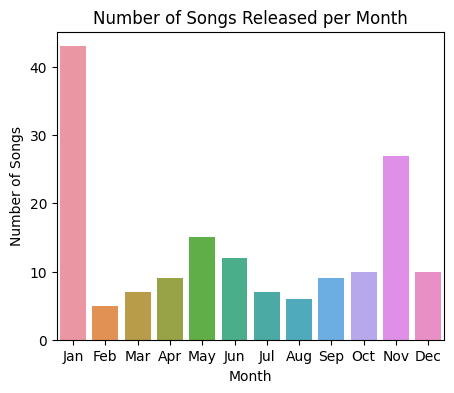

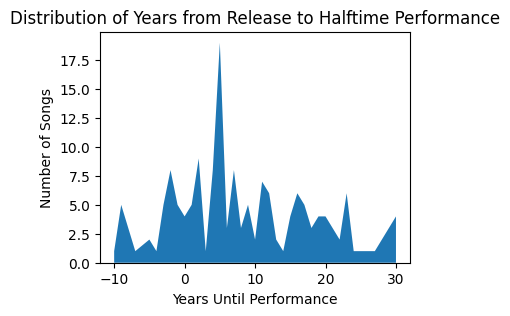

In [130]:
songs_per_month = halftime_data['Month Released'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(5,4))
sns.barplot(x=songs_per_month.index, y=songs_per_month.values)
plt.title('Number of Songs Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

##########################################################################
# Calculate the number of years between a song's release and its halftime performance
# and create a frequency distribution directly
frequency_distribution = (halftime_data['Performance Year'] - halftime_data['Year Released']).value_counts().sort_index()

plt.figure(figsize=(4, 3))
plt.stackplot(frequency_distribution.index, frequency_distribution.values, labels=frequency_distribution.index)
plt.title('Distribution of Years from Release to Halftime Performance')
plt.xlabel('Years Until Performance')
plt.ylabel('Number of Songs')
plt.show()



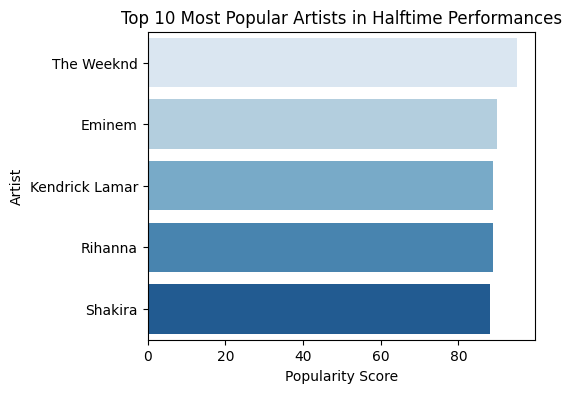

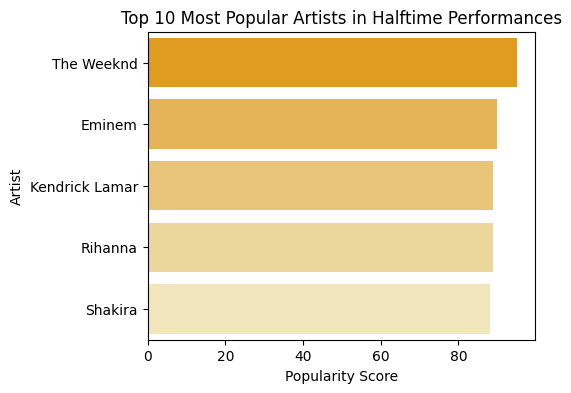

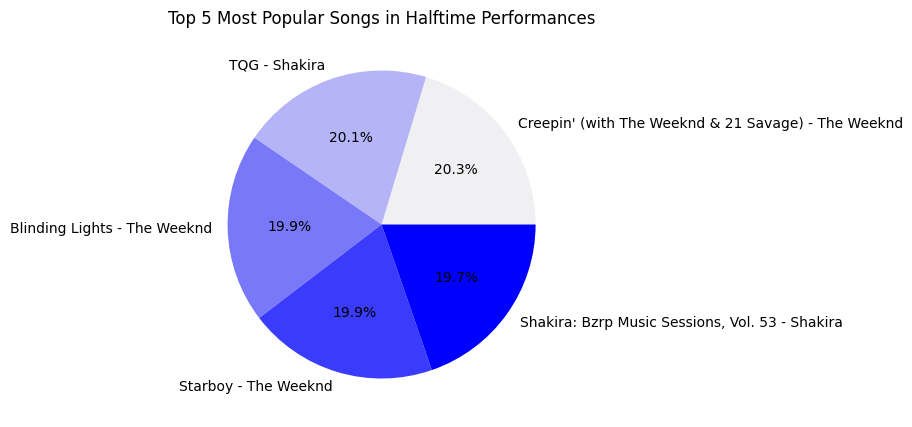

In [131]:
# Sort by artist popularity
top_artists = halftime_data.sort_values('Popularity Score', ascending=False).drop_duplicates('Artist').head(5)

# Create the plot
plt.figure(figsize=(5,4))  # Adjusted size for better visualization
sns.barplot(y=top_artists['Artist'], x=top_artists['Popularity Score'], palette='Blues')
plt.title('Top 10 Most Popular Artists in Halftime Performances')
plt.xlabel('Popularity Score')
plt.ylabel('Artist')
plt.show()

# Sort by artist popularity
top_artists = halftime_data.sort_values('Popularity Score', ascending=False).drop_duplicates('Artist').head(5)

# Create the plot
plt.figure(figsize=(5,4))  # Adjusted size for better visualization

# Create a color palette
palette = ["#ffa600", "#fcba3f", "#facc66", "#f9dd8d", "#fbecb3", "#fffada"]

sns.barplot(y=top_artists['Artist'], x=top_artists['Popularity Score'], palette=palette)
plt.title('Top 10 Most Popular Artists in Halftime Performances')
plt.xlabel('Popularity Score')
plt.ylabel('Artist')
plt.show()


import seaborn as sns

# Sort by track popularity
top_songs = halftime_data.sort_values('Track Popularity', ascending=False).head(5)

# Create a light color palette from blue
light_colors = sns.light_palette("blue", n_colors=5)

# Create the plot
plt.figure(figsize=(5,5))  # Adjusted size for better visualization
plt.pie(top_songs['Track Popularity'], labels=top_songs['Song'] + ' - ' + top_songs['Artist'], autopct='%1.1f%%', colors=light_colors)
plt.title('Top 5 Most Popular Songs in Halftime Performances')
plt.show()


In [10]:
# Select the last song released before each halftime performance and sort by release date in descending order
before_halftime = halftime_data[halftime_data['Release Date'] < halftime_data['Halftime Date']].groupby('Artist').apply(lambda x: x.sort_values('Release Date', ascending=False)).reset_index(drop=True)

# Select the first song released after each halftime performance and sort by release date in ascending order
after_halftime = halftime_data[halftime_data['Release Date'] > halftime_data['Halftime Date']].groupby('Artist').apply(lambda x: x.sort_values('Release Date', ascending=True)).reset_index(drop=True)

# Concatenate the two sets of songs and sort them by various columns
halftime_data = pd.concat([before_halftime, after_halftime]).sort_values(['Halftime Date', 'Release Date', 'Month Released', 'Year Released', 'Artist'], ascending=[True, True, True, True, True]).reset_index(drop=True)

# Add a new column to indicate whether the song was released before the halftime performance
halftime_data['Pre-Halftime?'] = halftime_data['Release Date'] < halftime_data['Halftime Date']

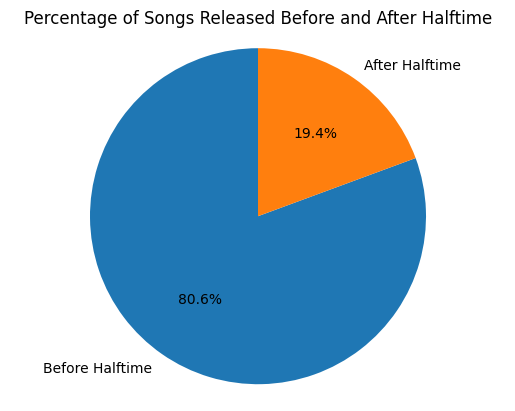

In [126]:
# Calculate the number of songs released before and after halftime
before_halftime_count = halftime_data['Pre-Halftime?'].value_counts()[True]
after_halftime_count = halftime_data['Pre-Halftime?'].value_counts()[False]

# Create the data for the pie chart
labels = ['Before Halftime', 'After Halftime']
sizes = [before_halftime_count, after_halftime_count]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Percentage of Songs Released Before and After Halftime')

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()


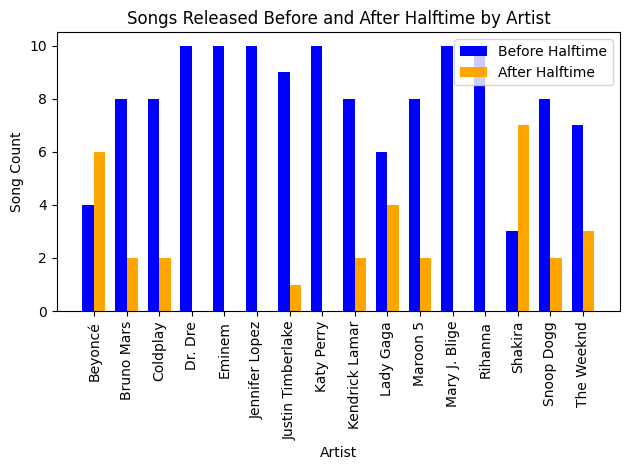

In [125]:
# Count the number of songs released before and after halftime for each artist
artist_counts = halftime_data.groupby(['Artist', 'Pre-Halftime?']).size().unstack().fillna(0)

# Get the list of artists and the corresponding song counts
artists = artist_counts.index
pre_halftime_counts = artist_counts[True].values
post_halftime_counts = artist_counts[False].values

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(artists))
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
plt.bar(r1, pre_halftime_counts, color='blue', width=bar_width, label='Before Halftime')
plt.bar(r2, post_halftime_counts, color='orange', width=bar_width, label='After Halftime')

# Add labels and title
plt.xlabel('Artist')
plt.ylabel('Song Count')
plt.title('Songs Released Before and After Halftime by Artist')
plt.xticks([r + bar_width/2 for r in range(len(artists))], artists, rotation='vertical')
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


In [104]:
# Split the DataFrame into pre-halftime and post-halftime datasets, rename columns, and drop unnecessary ones
pre = halftime_data[halftime_data['Pre-Halftime?'] == True].reset_index(drop=True)

# Convert specific columns to integers
pre[['Popularity Score', 'Track Popularity']] = pre[['Popularity Score', 'Track Popularity']].fillna(0).astype(int)

# Drop unnecessary columns from pre and post dataframes
pre.drop(['Album', 'Release Date', 'Popularity Score', 'Song', 'Month Released', 'Year Released', 'Pre-Halftime?'], axis=1, inplace=True)

# Drop rows where both Post-Popularity and Pre-Popularity are NaN
pre.dropna(subset=['Performance Year', 'Track Popularity'], how='all', inplace=True)

# Group the dataframe by 'Artist' and calculate the mean 'Track Popularity'
avg_track_popularity = pre.groupby('Artist')['Track Popularity'].mean().reset_index()

# Rename the 'Track Popularity' to 'Avg Pre Score'
avg_track_popularity.rename(columns={'Track Popularity': 'Avg Pre Score'}, inplace=True)

# Merge 'avg_track_popularity' with 'pre' on 'Artist'
pre = pd.merge(pre, avg_track_popularity, on='Artist')

# Drop the original 'Track Popularity' column
pre.drop(['Track Popularity'], axis=1, inplace=True)

# Remove duplicate rows
pre = pre.drop_duplicates()

# Remove timestamp from 'Halftime Date'
pre['Halftime Date'] = pre['Halftime Date'].dt.date

# Convert 'Avg Pre Score' to integer
pre['Avg Pre Score'] = pre['Avg Pre Score'].round().astype(int)

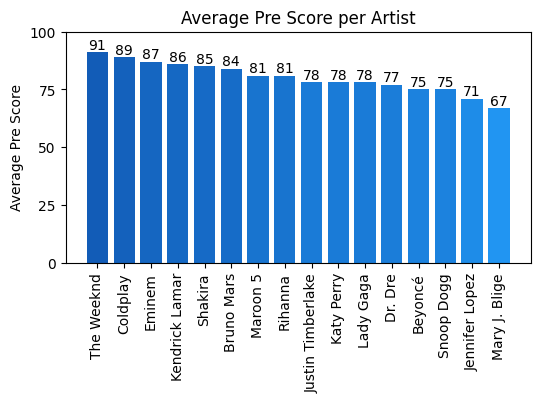

In [134]:
# Group by Artist and calculate the mean 'Avg Pre Score'
avg_pre_score = pre.groupby('Artist')['Avg Pre Score'].mean().reset_index()

# Sort the data by descending average pre score
avg_pre_score = avg_pre_score.sort_values('Avg Pre Score', ascending=False)

# Create the figure and axes objects, specify the size
fig, ax = plt.subplots(figsize=(6, 3))

# Define the color gradient with shades of blue
colors = mcolors.LinearSegmentedColormap.from_list('BlueShades', ['#C8E6C9', '#81D4FA', '#2196F3', '#0D47A1'])

# Plot bars with the desired color gradient
bar1 = ax.bar(avg_pre_score['Artist'], avg_pre_score['Avg Pre Score'], color=colors(avg_pre_score['Avg Pre Score']/100))

# Customize the y-axis
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 25))
ax.yaxis.tick_left()

# Rotate y-axis labels to be horizontal
plt.yticks(rotation='horizontal')

# Add data labels
for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Customize the x-axis labels
plt.xticks(rotation='vertical')

# Set the y-axis label
ax.set_ylabel('Average Pre Score')

# Set the title
ax.set_title('Average Pre Score per Artist')

# Remove gridlines
ax.grid(False)

# Show the bar graph
plt.show()


In [105]:
# Split the DataFrame into post-halftime and post-halftime datasets, rename columns, and drop unnecessary ones
post = halftime_data[halftime_data['Pre-Halftime?'] == False].reset_index(drop=True)

# Convert specific columns to integers
post[['Popularity Score', 'Track Popularity']] = post[['Popularity Score', 'Track Popularity']].fillna(0).astype(int)

# Drop unnecessary columns from post and post dataframes
post.drop(['Album', 'Release Date', 'Popularity Score', 'Song', 'Month Released', 'Year Released', 'Pre-Halftime?'], axis=1, inplace=True)

# Drop rows where both Post-Popularity and post-Popularity are NaN
post.dropna(subset=['Performance Year', 'Track Popularity'], how='all', inplace=True)

# Group the dataframe by 'Artist' and calculate the mean 'Track Popularity'
avg_track_popularity = post.groupby('Artist')['Track Popularity'].mean().reset_index()

# Rename the 'Track Popularity' to 'Avg Post Score'
avg_track_popularity.rename(columns={'Track Popularity': 'Avg Post Score'}, inplace=True)

# Merge 'avg_track_popularity' with 'post' on 'Artist'
post = pd.merge(post, avg_track_popularity, on='Artist')

# Drop the original 'Track Popularity' column
post.drop(['Track Popularity'], axis=1, inplace=True)

# Remove duplicate rows
post = post.drop_duplicates()

# Remove timestamp from 'Halftime Date'
post['Halftime Date'] = post['Halftime Date'].dt.date

# Convert 'Avg Post Score' to integer
post['Avg Post Score'] = post['Avg Post Score'].round().astype(int)

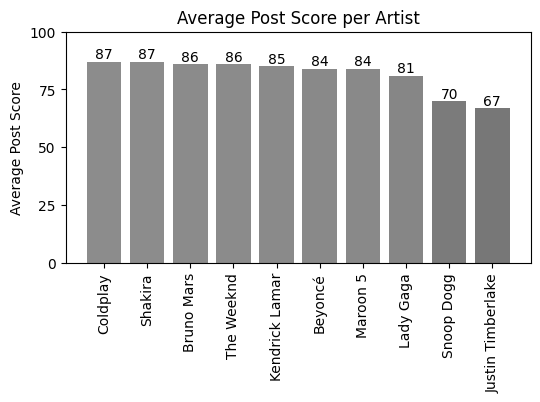

In [135]:
# Group by Artist and calculate the mean 'Avg Post Score'
avg_post_score = post.groupby('Artist')['Avg Post Score'].mean().reset_index()

# Sort the data by descending average post score
avg_post_score = avg_post_score.sort_values('Avg Post Score', ascending=False)

# Create the figure and axes objects, specify the size
fig, ax = plt.subplots(figsize=(6, 3))

# Define the color gradient with darker shades of gray
colors = mcolors.LinearSegmentedColormap.from_list('GrayShades', ['#333333', '#555555', '#777777', '#999999'])

# Plot bars with the desired color gradient
bar1 = ax.bar(avg_post_score['Artist'], avg_post_score['Avg Post Score'], color=colors(avg_post_score['Avg Post Score']/100))

# Customize the y-axis
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 25))
ax.yaxis.tick_left()

# Rotate y-axis labels to be horizontal
plt.yticks(rotation='horizontal')

# Add data labels
for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Customize the x-axis labels
plt.xticks(rotation='vertical')

# Set the y-axis label
ax.set_ylabel('Average Post Score')

# Set the title
ax.set_title('Average Post Score per Artist')

# Remove gridlines
ax.grid(False)

# Show the bar graph
plt.show()


In [13]:
# Merge pre and post dataframes
merged = pd.merge(pre, post, on=['Artist', 'Halftime Date', 'Performance Year'], how='inner')

# Select only necessary columns
merged = merged[['Artist', 'Halftime Date', 'Performance Year', 'Avg Pre Score', 'Avg Post Score']]

# Calculate mean score and percentage change
merged['Mean'] = merged[['Avg Pre Score', 'Avg Post Score']].mean(axis=1).astype(int)
merged['% Change'] = ((merged['Avg Post Score'] / merged['Avg Pre Score'] - 1) * 100).round(1)

# Calculate score difference
merged['Delta'] = merged['Avg Post Score'] - merged['Avg Pre Score']

# Clean the data
merged = merged.sort_values('% Change').dropna(subset=['% Change']).reset_index(drop=True)

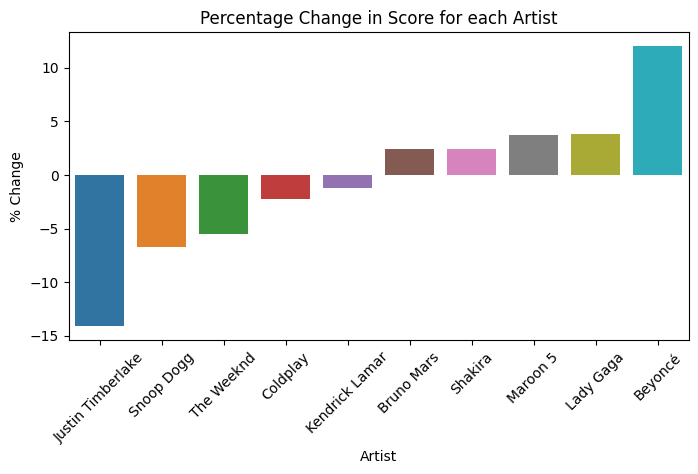

In [23]:
plt.figure(figsize=(8,4))
sns.barplot(data=merged, x='Artist', y='% Change')
plt.title('Percentage Change in Score for each Artist')
plt.xticks(rotation=45)
plt.show()

# Compute correlation
correlation = merged[['% Change', 'Avg Post Score']].corr()

# Create heatmap
plt.figure(figsize=(8,4))
sns.heatmap(correlation, annot=True, cmap='YlOrRd')
plt.title('Correlation between % Change and Avg Post Score')
plt.show()


Leverage High-Performing Posts: Since there is a strong positive correlation between the % Change (potentially referring to changes in user engagement or followers) and the Average Post Score, it's essential to focus on creating and promoting content that resonates with your audience and generates high post scores. High-quality content could result in a substantial percentage change in engagement, leading to increased visibility and reach.

Invest in Analytics and Content Strategy: With the clear relationship between post scores and user engagement changes, it's beneficial to invest in advanced analytics to identify key factors contributing to high post scores. This could include analyzing elements like post timing, content type, or use of keywords. Using these insights, strategize your content to maximize post scores, which, in turn, could lead to higher user engagement.

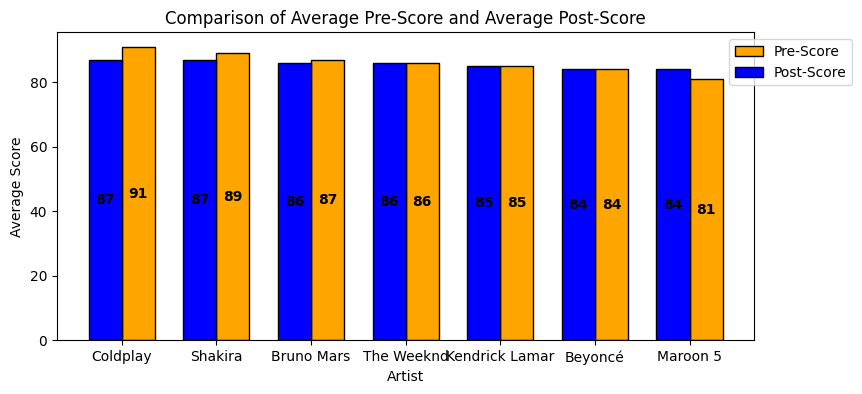

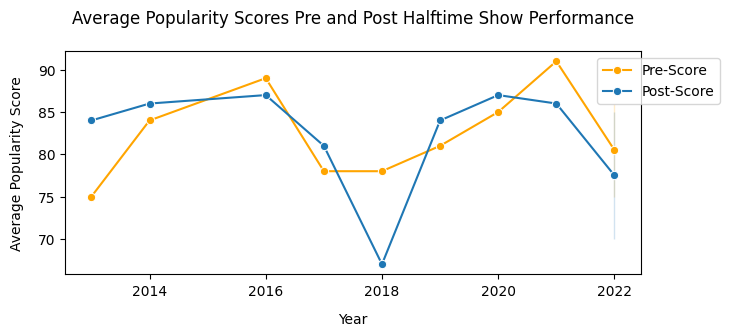

In [27]:
# Sort data and retrieve the top seven artists
top_post = post.sort_values('Avg Post Score', ascending=False).head(7)
top_pre = pre.sort_values('Avg Pre Score', ascending=False).head(7)

# Set up the plot
plt.figure(figsize=(9, 4))

# Create the pre and post-score bars
bar_width = 0.35
bar_l = np.arange(len(top_post['Artist']))
pre_bars = plt.bar(bar_l + bar_width, top_pre['Avg Pre Score'], width=bar_width, 
                   color='orange', edgecolor='black', label='Pre-Score')
post_bars = plt.bar(bar_l, top_post['Avg Post Score'], width=bar_width, 
                    color='blue', edgecolor='black', label='Post-Score')

# Function to add data labels inside the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{int(height)}', 
                 ha='center', va='center', color='black', fontsize=10, fontweight='bold')

add_labels(pre_bars)
add_labels(post_bars)

# Adjust the x-axis and add labels, title, and legend
plt.xticks(bar_l + bar_width / 2, top_post['Artist'], rotation=0)
plt.xlabel('Artist')
plt.ylabel('Average Score')
plt.title('Comparison of Average Pre-Score and Average Post-Score')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the plot
plt.show()


plt.figure(figsize=(8, 4))
sns.lineplot(data=merged, x='Performance Year', y='Avg Pre Score', marker='o', color='orange', label='Pre-Score')
sns.lineplot(data=merged, x='Performance Year', y='Avg Post Score', marker='o', label='Post-Score') # added label here
plt.title('Average Popularity Scores Pre and Post Halftime Show Performance', pad=20)
plt.xlabel('Year', labelpad=10)
plt.ylabel('Average Popularity Score', labelpad=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout(pad=3)
plt.show()

pre_scores = merged['Avg Pre Score']
post_scores = merged['Avg Post Score']


<center>
   <h1><span style="color: green; font-weight: bold;">Sentiment Analysis</span><span style="color: black; font-weight: normal;">

In [32]:
api_key = '<your_api_key>'
youtube = build('youtube', 'v3', developerKey=api_key)

In [33]:
# Define the artist and video_id pairings for future reference
matchup = [
    {"artist": "Beyonce", "video_id": "suIg9kTGBVI", "year": 2013},
    {"artist": "Bruno Mars", "video_id": "SDPITj1wlkg", "year": 2014},
    {"artist": "Katy Perry", "video_id": "ZD1QrIe--_Y", "year": 2015},
    {"artist": "Coldplay", "video_id": "c9cUytejf1k", "year": 2016},
    {"artist": "Lady Gaga", "video_id": "txXwg712zw4", "year": 2017},
    {"artist": "Justin Timberlake", "video_id": "v6xUgawDQB0", "year": 2018},
    {"artist": "Maroon 5", "video_id": "zIwkhEqVq4s", "year": 2019},
    {"artist": "JLo & Shakira", "video_id": "pILCn6VO_RU", "year": 2020},
    {"artist": "The Weeknd", "video_id": "9rhadTURsrw", "year": 2021},
    {"artist": "Kendrick Lamar & Friends", "video_id": "gdsUKphmB3Y", "year": 2022}]

# Initialize DataFrame
data = pd.DataFrame(columns=['Artist', 'Comments', 'Year'])

In [37]:
import re

def video_comments(video_id, artist, year):
    # Initialize lists to store comments, dates, video_ids, and artists
    comments = []
    artists = []
    years = []

    # Initialize a variable for page navigation in YouTube results
    nextPageToken = None

    while True:
        # Retrieve comment threads associated with the video
        video_response = youtube.commentThreads().list(
            part="snippet",
            maxResults=100,
            moderationStatus="published",
            order="relevance",
            textFormat="plainText",
            videoId=video_id,
            pageToken=nextPageToken
        ).execute()

        # Iterate over items in the video response
        for item in video_response['items']:
            # Extract comment, date, video_id, and artist
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']

            # Store extracted data in respective lists
            comments.append(comment)
            artists.append(artist)
            years.append(year)

        # Prepare for next page of results
        nextPageToken = video_response.get('nextPageToken')

        # Stop if there are no more pages or if the comment limit has been reached
        if not nextPageToken or len(comments) >= 25:
            break

    # Create a DataFrame with collected data
    df = pd.DataFrame({'Artist': artists, 'Comments': comments, 'Year': years})
    return df

# Call function for each artist and video id pairing, and append resulting DataFrame to list
for match in matchup:
    data = pd.concat([data, video_comments(match['video_id'], match['artist'], match['year'])], ignore_index=True)

# Initialize the SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Initialize lists to store sentiment scores
positive, negative, neutral, compound = [], [], [], []

# Iterate through each comment, perform sentiment analysis and store results
for comment in data["Comments"]:
    sentiment_dict = sentiments.polarity_scores(comment)
    positive.append(sentiment_dict["pos"])
    negative.append(sentiment_dict["neg"])
    neutral.append(sentiment_dict["neu"])
    compound.append(sentiment_dict["compound"])

# Assign sentiment scores to the respective columns
data["Positive"] = positive
data["Negative"] = negative
data["Neutral"] = neutral
data["Compound"] = compound

# Classify overall sentiment based on compound score and assign to new "Sentiment" column
data["Analysis"] = data["Compound"].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Display the first few rows of the DataFrame
data.head()


,Artist,Comments,Year,Positive,Negative,Neutral,Compound,Analysis
0,Beyonce,I literally watch this after every Super Bowl ...,2013,0.309,0.063,0.628,0.7269,Positive
1,Beyonce,"10 years later, this performance still gives m...",2013,0.000,0.000,1.000,0.0000,Neutral
2,Beyonce,The one thing about Beyonce's halftime show th...,2013,0.147,0.000,0.853,0.7506,Positive
3,Beyonce,Beyonce is just different. Her background danc...,2013,0.101,0.000,0.899,0.8118,Positive
4,Beyonce,I never realized Beyonce is head and shoulders...,2013,0.428,0.000,0.572,0.9136,Positive


In [136]:
# Count and print the number of unique rows in the DataFrame
print(f"Number of unique rows: {data.astype(str).agg(' '.join, axis=1).nunique()}")


# Check for the total number of missing values in the DataFrame
print("\nNumber of Missing Values:\n", data.isna().sum().sum())

# Check for the total number of duplicated rows in the DataFrame
print("\nNumber of Duplicated Rows:\n", data.duplicated().sum())

# Drop missing values
data = data.dropna()

# Drop duplicates
data = data.drop_duplicates()

# Recheck the number of missing values and duplicates after dropping them
print("\nNumber of Missing Values After Dropping:\n", data.isna().sum().sum())
print("\nNumber of Duplicated Rows After Dropping:\n", data.duplicated().sum())


Number of unique rows: 721

Number of Missing Values:
 0

Number of Duplicated Rows:
 0

Number of Missing Values After Dropping:
 0

Number of Duplicated Rows After Dropping:
 0


In [44]:
# Define function to clean text
def clean_text(text):
    # Remove text between side brackets
    text = re.sub(r"\[.*?\]", "", text)

    # Remove '@' mentions
    text = re.sub(r'@[A-Za-z0-9]+', '', text)

    # Remove hyperlinks
    text = re.sub(r'https?:\/\/\S+', '', text)

    # Remove strings starting with 'a href...'
    text = re.sub(r'a\s+href[^>]+>', '', text)

    # Remove strings starting with 'href'
    text = re.sub(r'href[^>]+>', '', text)

    # Remove numbers within words
    text = re.sub(r'\b\d+\b', '', text)

    # Remove numbers within words with apostrophes
    text = re.sub(r"\w+\d+\w+", lambda m: re.sub(r'\d', '', m.group()), text)

    # Remove double spaces
    text = re.sub(r"\s\s+", " ", text)
    
    # Remove punctuation marks
    text = text.translate(str.maketrans("", "", string.punctuation))

    return text

# Clean the 'Comments' column
data['Comments'] = data['Comments'].apply(clean_text)

# Define function 'detect_language' to determine the language of a text
def detect_language(text):
    try:
        return detect(text)
    except:
        return None

# Apply 'detect_language' function to 'Comments' column to identify languages of comments
data['language'] = data['Comments'].apply(detect_language)

# Filter the DataFrame to only include rows where the detected language is English ('en')
# Reset index to have a continuous index after filtering out rows
data = data[data['language'] == 'en'].reset_index(drop=True)

# Drop the 'language' column from the DataFrame
data = data.drop('language', axis=1)

# Rename the 'Compound' column to 'Sentiment'
data = data.rename(columns={'Compound': 'Sentiment'})

data.reset_index(drop=True)

# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
data.loc[:, 'Subjectivity'] = data['Comments'].apply(getSubjectivity)
data.loc[:, 'Polarity'] = data['Comments'].apply(getPolarity)

In [45]:
sentiment_counts = data.groupby(['Artist', 'Year'])['Sentiment'].sum().round().astype(int).reset_index()

# Sort the dataframe by 'Performance Year'
sentiment_counts = sentiment_counts.sort_values(by='Year')

print(sentiment_counts)

                     Artist  Year  Sentiment
0                   Beyonce  2013         45
1                Bruno Mars  2014         36
5                Katy Perry  2015         25
2                  Coldplay  2016         35
7                 Lady Gaga  2017         39
4         Justin Timberlake  2018         50
8                  Maroon 5  2019         21
3             JLo & Shakira  2020         19
9                The Weeknd  2021         31
6  Kendrick Lamar & Friends  2022         32


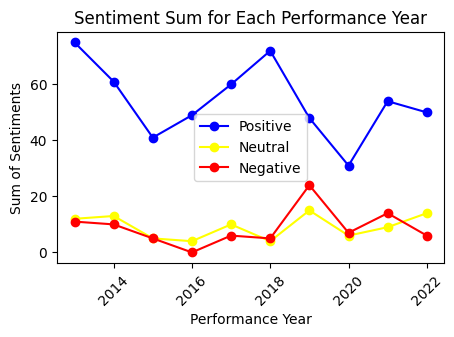

In [46]:
# Define the colors for each sentiment
colors = {'Positive': 'blue', 'Neutral': 'yellow', 'Negative': 'red'}

# Group by performance year and sentiment
sentiment_counts = data.groupby(['Year', 'Analysis']).size().unstack().fillna(0)

# Plot the lines for each sentiment
plt.figure(figsize=(5, 3))

# Plot positive sentiment line
plt.plot(sentiment_counts.index, sentiment_counts['Positive'], marker='o', label='Positive', color=colors['Positive'])

# Plot neutral sentiment line
plt.plot(sentiment_counts.index, sentiment_counts['Neutral'], marker='o', label='Neutral', color=colors['Neutral'])

# Plot negative sentiment line
plt.plot(sentiment_counts.index, sentiment_counts['Negative'], marker='o', label='Negative', color=colors['Negative'])

plt.title('Sentiment Sum for Each Performance Year')
plt.xlabel('Performance Year')
plt.ylabel('Sum of Sentiments')
plt.xticks(rotation=45)
plt.legend()

plt.show()


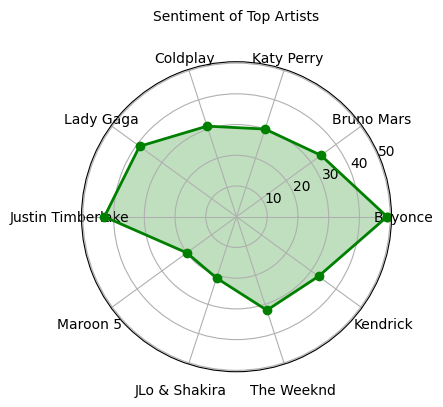

In [68]:
# Data
artists = ['Beyonce', 'Bruno Mars', 'Katy Perry', 'Coldplay', 'Lady Gaga',
           'Justin Timberlake', 'Maroon 5', 'JLo & Shakira', 'The Weeknd', 'Kendrick']
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
sentiments = [49, 34, 30, 31, 39, 43, 20, 21, 32, 33]

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(4, 8), subplot_kw=dict(polar=True))

# Compute angles for each artist
angles = np.linspace(0, 2 * np.pi, len(artists), endpoint=False).tolist()
angles += angles[:1]  # Close the shape

# Plot the radar chart
ax.plot(angles, sentiments + sentiments[:1], 'o-', linewidth=2, color='green')
ax.fill(angles, sentiments + sentiments[:1], alpha=0.25, color='green')

# Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(artists)

# Move artist names outside the plot
for label, angle in zip(ax.get_xticklabels(), angles):
    x, y = label.get_position()
    angle_deg = np.degrees(angle)
    if angle_deg >= 0 and angle_deg <= 180:
        label.set_position((x, y + 0.05))
    else:
        label.set_position((x, y - 0.05))
    label.set_rotation(angle_deg)

# Set the title
ax.set_title('Sentiment of Top Artists', size=10, pad=30)


# Show the plot
plt.show()

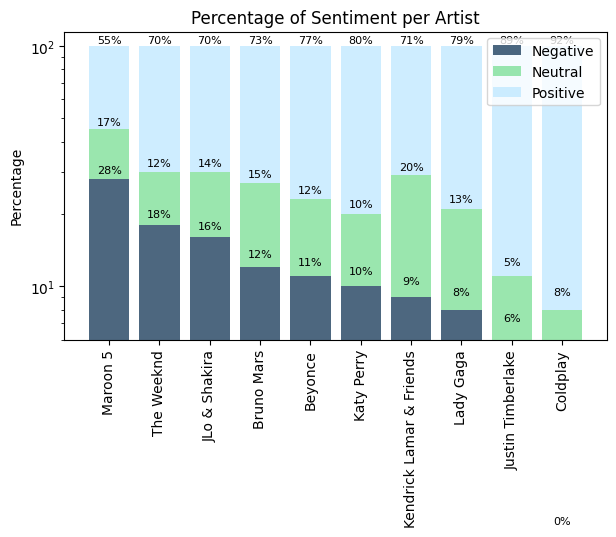

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage of each sentiment per artist
sentiment_percentage = data.groupby(['Artist', 'Analysis']).size() / data.groupby('Artist').size() * 100
sentiment_percentage = sentiment_percentage.unstack().round().fillna(0).astype(int)

# Sort artists by negative sentiment, then by neutral sentiment, and then by positive sentiment
sentiment_percentage = sentiment_percentage.sort_values(by=['Negative', 'Neutral', 'Positive'], ascending=[False, False, False])

# Calculate the average sentiment percentages
average_sentiment = sentiment_percentage.mean()

# Set the faded colors for each sentiment category
colors = ['#012749', '#6fdc8c', '#bae6ff']  # Updated colors to Magenta 70, Teal 70, and Purple 50

# Plot the vertical triple bar graph
plt.figure(figsize=(7, 4))  # Adjust figure size as needed

# Get the artists and their corresponding index positions
artists = sentiment_percentage.index
positions = np.arange(len(artists))

# Plot the negative sentiment bars
neg_bars = plt.bar(positions, sentiment_percentage['Negative'], color=colors[0], alpha=0.7, label='Negative')

# Plot the neutral sentiment bars
neu_bars = plt.bar(positions, sentiment_percentage['Neutral'], color=colors[1], alpha=0.7, label='Neutral',
                   bottom=sentiment_percentage['Negative'])

# Plot the positive sentiment bars
pos_bars = plt.bar(positions, sentiment_percentage['Positive'], color=colors[2], alpha=0.7, label='Positive',
                   bottom=sentiment_percentage['Negative'] + sentiment_percentage['Neutral'])

# Customize the x-axis labels
plt.xticks(positions, artists, rotation='vertical')

# Set the y-axis label
plt.ylabel('Percentage')

# Set the title
plt.title('Percentage of Sentiment per Artist')

# Add legend
plt.legend()

# Add data labels
for i, (neg_bar, neu_bar, pos_bar) in enumerate(zip(neg_bars, neu_bars, pos_bars)):
    neg_height = neg_bar.get_height()
    neu_height = neu_bar.get_height()
    pos_height = pos_bar.get_height()

    plt.text(neg_bar.get_x() + neg_bar.get_width() / 2, neg_height + 1, str(int(neg_height)) + '%',
             ha='center', va='bottom', fontsize=8)
    plt.text(neu_bar.get_x() + neu_bar.get_width() / 2, neg_height + neu_height + 1, str(int(neu_height)) + '%',
             ha='center', va='bottom', fontsize=8)
    plt.text(pos_bar.get_x() + pos_bar.get_width() / 2, neg_height + neu_height + pos_height + 1, str(int(pos_height)) + '%',
             ha='center', va='bottom', fontsize=8)

# Adjust y-axis scale
plt.yscale('log')

# Show the vertical triple bar graph
plt.show()

In [91]:
# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
sortedDF = data.sort_values(by='Polarity').reset_index()  # Sort the comments

# Printing a few positive comments
positive_comments = sortedDF[sortedDF['Analysis'] == 'Positive']
num_comments_to_display = 5  # Specify the number of positive comments to display

print('Positive comments:\n')
for i, comment in enumerate(positive_comments['Comments'][:num_comments_to_display], start=1):
    print(f"{i}) {comment}\n")



# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
# Printing a few negative comments
negative_comments = sortedDF[sortedDF['Analysis'] == 'Negative']
num_comments_to_display = 5  # Specify the number of negative comments to display

print('Negative comments:\n')
for i, comment in enumerate(negative_comments['Comments'][:num_comments_to_display], start=1):
    print(f"{i}) {comment}\n")


Positive comments:

1) Goosebumbs when Dre starts playing 2Pacs I aint Mad At Cha at to give him a litte tribute

2) His band sounds so on point crazy the amount of talent and also how bad ass it sounds with actual instruments

3) Never get tired of listening to Coldplay ❤

4) katy reminds me of one of them holiday entertainers her energy is mad insane and just love everything abt her

5) Thank you for this moment I am almost in tears She worked so hard and it showed on that stage Thank YOU Beyonce for delivering

Negative comments:

1) This performance was fireeee It wasn’t even bad at all

2) People don’t give Abel enough credit for this performance Despite being given the worst deck of cards that anyone will probably ever get he still managed to pull it off fantastically

3) anyone else just randomly get in a weird mood and watch a bunch of halftime show performances

4) Hip hop will never be like this ever againWhat a nostalgic feeling

5) No way it aint hotter hit when DRE is behi

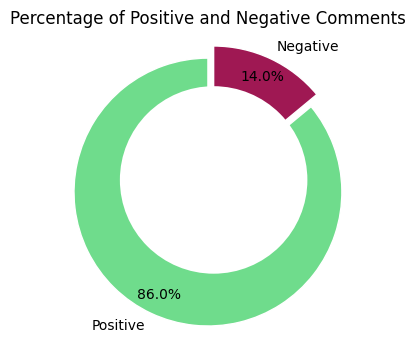

In [140]:
# Calculate the percentage of positive and negative comments
positive_percentage = positive_comments_count / total_comments
negative_percentage = negative_comments_count / total_comments

# Set up the data for the pie chart
labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
colors = ['#6fdc8c', '#9f1853']  # Updated colors to Teal 70 and Magenta 70
explode = [0.1, 0]  # Explode the positive section slightly to create a donut appearance

# Create the donut chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 1}, pctdistance=0.85)

# Draw a white circle at the center to create the donut hole
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

# Set the title
plt.title('Percentage of Positive and Negative Comments')

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Show the donut chart
plt.show()


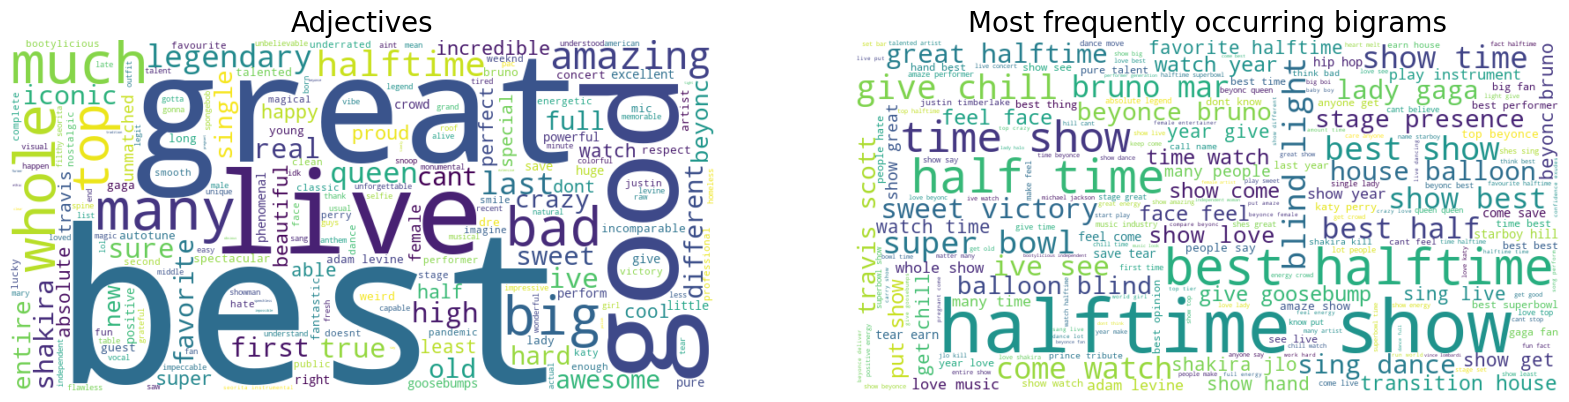

In [54]:
from nltk.tokenize import WordPunctTokenizer

# change DataFrame columns into a list
title = data['Comments'].values

# tokenize
title_text = ""
title_all = []
for _ in title:
    title_text += (_ + " ")
    title_all.append(_)

word_punct_token = WordPunctTokenizer().tokenize(title_text)

# Remove unwanted words from the token list
unwanted_words = ["Super", "Bowl", "Super Bowl", "Superbowl", "Halftime", "Half", "Time", "Super Bowl Halftime",
                  "performance", "performances", "Performance", "Performances", "halftime show", "super bowl",
                  "Super Bowl", "best halftime", "Best Halftime", "half time", "Half Time",
                  "time show", "Time Show", "best super", "Best Super", "bowl halftime", "Bowl Halftime",
                  "best performance", "Best Performance", "halftime performance", "Halftime Performance",
                  "superbowl performance", "Superbowl Performance", "bowl performance", "Bowl Performance",
                  "lady gaga", "Lady Gaga", "live performance", "Live Performance", "travis scott", "Travis Scott",
                  "beyonce bruno", "Beyonce Bruno", "beyonc bruno", "Beyonc Bruno", "superbowl halftime", "Superbowl Halftime", "adam levine", "Adam Levine"]


clean_token = []
for token in word_punct_token:
    new_token = re.sub(r'[^a-zA-Z]+', '', token)  # remove any value that is not alphabetical
    if new_token != "" and len(new_token) >= 2 and new_token not in unwanted_words:
        vowels = len([v for v in new_token if v in "aeiou"])
        if vowels != 0:  # remove line that only contains consonants
            new_token = new_token.lower()  # change to lowercase
            clean_token.append(new_token)

# Get the list of stop words
stop_words_list = stopwords.words('english')
stop_words_list.extend(["could", "though", "would", "also", "us"])

# Remove the stop words from the list of tokens
tokens = [x for x in clean_token if x not in stop_words_list]

# POS Tag every token and save into a DataFrame
data_tagset = nltk.pos_tag(tokens)
data_tagset = pd.DataFrame(data_tagset, columns=['Word', 'Tag'])

# Focus on nouns, adjectives, and verbs
tagset_allowed = ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
new_tagset = data_tagset.loc[data_tagset['Tag'].isin(tagset_allowed)]
text = [str(x) for x in new_tagset['Word']]
tag = [x for x in new_tagset['Tag'] if x != '']

# Create lemmatizer object
lemmatizer = WordNetLemmatizer()

# Lemmatize each word and display the output
lemmatize_text = []
for word in text:
    output = [word, lemmatizer.lemmatize(word, pos='n'), lemmatizer.lemmatize(word, pos='a'),
              lemmatizer.lemmatize(word, pos='v')]
    lemmatize_text.append(output)

# Create data1Frame using original words and their lemma words
data1 = pd.DataFrame(lemmatize_text, columns=['Word', 'Lemmatized Noun', 'Lemmatized Adjective', 'Lemmatized Verb'])
data1['Tag'] = tag

# Replace with single character for simplifying
data1 = data1.replace(['NN', 'NNS', 'NNP', 'NNPS'], 'n')
data1 = data1.replace(['JJ', 'JJR', 'JJS'], 'a')
data1 = data1.replace(['VBG', 'VBP', 'VB', 'VBD', 'VBN', 'VBZ'], 'v')

data1_lemmatized = data1.copy()
data1_lemmatized['Temp Lemmatized Word'] = data1_lemmatized['Lemmatized Noun'] + ' | ' + data1_lemmatized[
    'Lemmatized Adjective'] + ' | ' + data1_lemmatized['Lemmatized Verb']
lemma_word = data1_lemmatized['Temp Lemmatized Word']
tag = data1_lemmatized['Tag']
new_word = []
for i in range(len(tag)):
    words = lemma_word[i].split('|')
    if tag[i] == 'n':
        word = words[0]
    elif tag[i] == 'a':
        word = words[1]
    elif tag[i] == 'v':
        word = words[2]
    new_word.append(word)

data1_lemmatized['Lemmatized Word'] = new_word

lemma_word = [str(x) for x in data1_lemmatized['Lemmatized Word']]

fig, axs = plt.subplots(1, 2, figsize=(20,10))

# Select only adjectives for word cloud
tagset_allowed = ['a']
new_tagset = data1_lemmatized.loc[data1_lemmatized['Tag'].isin(tagset_allowed)]
text_adj = ' '.join(str(x) for x in new_tagset['Lemmatized Adjective'])
wordcloud_adj = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_adj)
axs[0].imshow(wordcloud_adj, interpolation='bilinear')
axs[0].axis("off")
axs[0].set_title('Adjectives', fontsize=20)  # Increase title font size here

# Using count vectorizer to view the frequency of bigrams
tagset_allowed = ['a', 'n', 'v']
new_tagset = data1_lemmatized.loc[data1_lemmatized['Tag'].isin(tagset_allowed)]
text_bigrams = ' '.join(str(x) for x in new_tagset['Lemmatized Word'])
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform([text_bigrams])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

words_dict = dict(words_freq)
WC_height = 400
WC_width = 800
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, background_color='white')
wordCloud.generate_from_frequencies(words_dict)
axs[1].imshow(wordCloud, interpolation='bilinear')
axs[1].axis("off")
axs[1].set_title('Most frequently occurring bigrams', fontsize=20)  # Increase title font size here

plt.show()

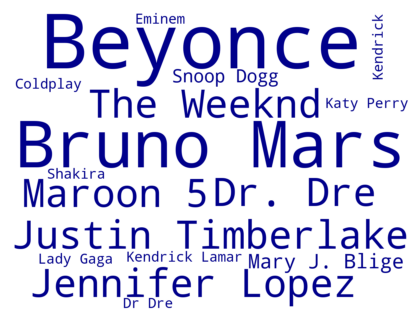

In [55]:
# Your other code...

# Replace synonyms in the list
my_list = [synonyms.get(name, name) for name in my_list]

# Convert it to a dictionary with values and their occurrences
word_could_dict=Counter(my_list)

# Create a color gradient
cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", ["lightblue", "darkblue"])

# Find the maximum word size to normalize the font sizes
max_word_size = max(word_could_dict.values())

# Custom color function
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    r, g, b, _ = cmap(font_size / max_word_size)
    return 'rgb({:.0f}, {:.0f}, {:.0f})'.format(r*255, g*255, b*255)

# Create the word cloud
wordcloud = WordCloud(
    width = 400,
    height = 300,
    background_color ='white',
    max_words=20,
    contour_width=0,  # Set contour_width to 0
    collocations=False,
    color_func=color_func,
    scale=3  # Increase the scale to allow words to be drawn closer together
).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(4,4),facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


-------------------------------------------------------------------------------------------------------------------------

<center>
   <h1><span style="color: green; font-weight: bold;">The Tour Numbers: A Quantitative Exploration</span><span style="color: black; font-weight: normal;">

In [56]:
headliners_tours = {
    'Kendrick Lamar': {
        'The Damn Tour (2017-2018)': 77000000
    },
    'The Weeknd': {
        'Starboy: Legend of the Fall Tour (2017)': 82000000,
        'After Hours til Dawn Tour (2022)': 149000000
    },
    'Maroon 5': {
        'Red Pill Blues Tour (2018–2019)': 45700000,
        'The 2020 Tour (2020)': 180000000
    },
    'Justin Timberlake': {
        'The 20/20 Experience World Tour (2013-2015)': 232000000,
        'The Man of the Woods Tour (2018-2019)': 149000000
    },
    'Lady Gaga': {
        'ArtRave: The Artpop Ball (2014)': 85600000,
        'Joanne World Tour (2017–2018)': 94400000
    },
    'Coldplay': {
        'Mylo Xyloto (2011-2012)': 187500000,
        'A Head Full of Dreams Tour (2016–2017)': 523000000
    },
    'Katy Perry': {
        'Prismatic World Tour (2017-2018)': 204300000,
        'The Witness Tour': 122000000
    },
    'Bruno Mars': {
        'The Moonshine Jungle Tour (2013-2014)': 156400000,
        '24K Magic (2017-18)': 389389572
    },
    'Beyoncé': {
        'I Am... World Tour (2009-2010)': 119000000,
        'The Mrs. Carter Show World Tour (2013-2014)': 230000000
    }
}

# Initialize an empty list to store the percentage changes
percentage_changes = []

# Iterate over each artist and their corresponding tours
for artist, tours in headliners_tours.items():
    first_tour_revenue = list(tours.values())[0]
    last_tour_revenue = list(tours.values())[-1]
    percentage_change = ((last_tour_revenue - first_tour_revenue) / first_tour_revenue) * 100
    percentage_changes.append((artist, percentage_change))

# Sort the percentage changes in descending order
percentage_changes.sort(key=lambda x: x[1], reverse=True)

# Print the ranked list of artists and their corresponding percentage changes
for rank, (artist, percentage_change) in enumerate(percentage_changes, 1):
    print(f"Rank {rank}: {artist}: {percentage_change:.2f}%")

Rank 1: Maroon 5: 293.87%
Rank 2: Coldplay: 178.93%
Rank 3: Bruno Mars: 148.97%
Rank 4: Beyoncé: 93.28%
Rank 5: The Weeknd: 81.71%
Rank 6: Lady Gaga: 10.28%
Rank 7: Kendrick Lamar: 0.00%
Rank 8: Justin Timberlake: -35.78%
Rank 9: Katy Perry: -40.28%


In [57]:
#Extracting the first and last values from each artist's tours data
before_show = [list(tours.values())[0] for artist, tours in headliners_tours.items()]
after_show = [list(tours.values())[-1] for artist, tours in headliners_tours.items()]

#Performing a paired t-test on the before-show and after-show data
t_stat, p_value = stats.ttest_rel(before_show, after_show)

#Printing the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)


from sklearn.linear_model import LinearRegression

# Create arrays for the features (rankings) and the response (percentage_changes)
rankings = np.array(list(range(1, len(percentage_changes) + 1))).reshape(-1, 1)
changes = np.array([change for artist, change in percentage_changes]).reshape(-1, 1)

# Create a linear regression object
lm = LinearRegression()
lm.fit(rankings, changes)

# Get the coefficient of determination (R^2)
r_squared = lm.score(rankings, changes)
print("R-squared:", r_squared)


t-statistic: -1.7226200940010616
p-value: 0.12325473439134138
R-squared: 0.9334701424198197


<h1><center> End - Thank You</h1></center>